In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time

In [27]:
nheads = 0
Nflips = 50

for i in range(Nflips):
    if np.random.random() > 0.5:
        nheads += 1
        
print(nheads)

32


In [23]:
def get_nheads(nflips):
    nheads = 0

    for i in range(nflips):
        if np.random.random() > 0.5:
            nheads += 1

    return nheads

In [24]:
Ntests = 50
nheads_exp = []

for i in range(Ntests):
    result = get_nheads(Nflips)
    nheads_exp.append(result)


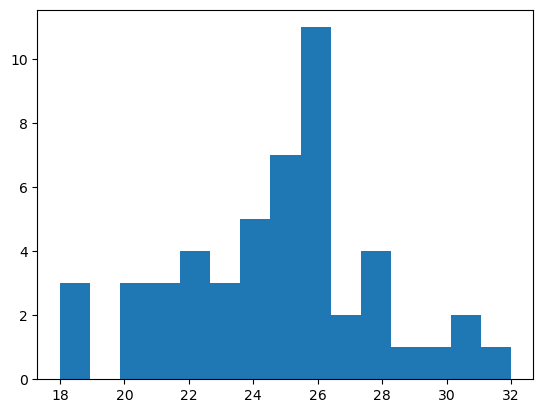

In [13]:
plt.hist(nheads_exp,bins=15)
plt.show()

KeyboardInterrupt: 

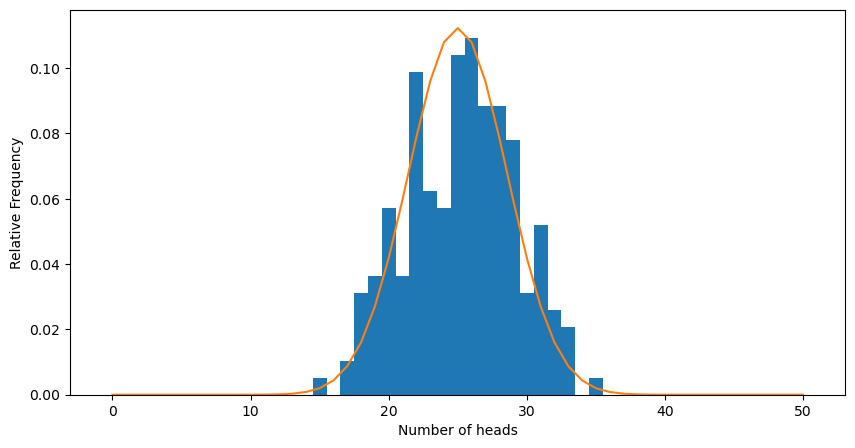

In [16]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
#ax2 = fig1.add_subplot(122)
fig1.canvas.draw()

nheads_exp = []
ntests = 200
nflips = 50

p = .5
x = np.array(range(nflips+1))
align='mid'
if nflips%2==0:
    align='left'
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

    ax1.clear()
    ax1.hist(nheads_exp, range=(0,nflips+1), bins = nflips+1, density=True, align=align)
    ax1.plot(x, binom.pmf(x, nflips, p))
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Number of heads")
    fig1.canvas.draw()
#    display.display(plt.gcf())
#    display.clear_output(wait=True)
    time.sleep(0.03)


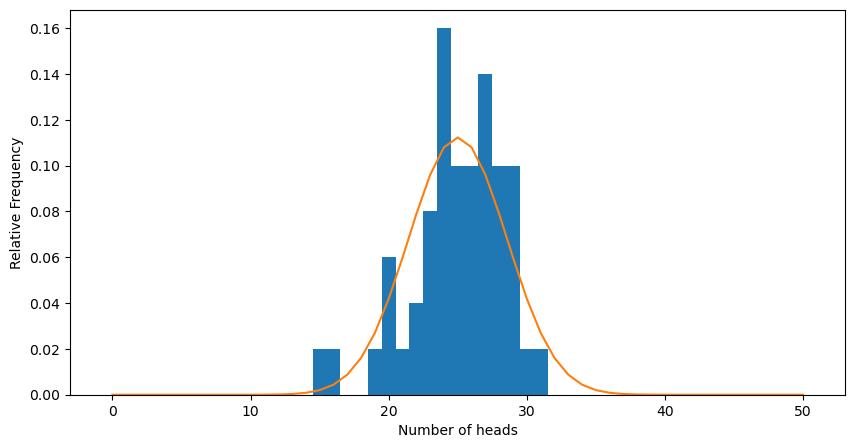

In [21]:
nheads_exp = []
ntests = 200
nflips = 50

p = .5
x = np.array(range(nflips+1))

for i in range(Ntests):
    result = get_nheads(Nflips)
    nheads_exp.append(result)

fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot() 
ax1.hist(nheads_exp, range=(0,nflips+1), bins = nflips+1, density=True, align=align)
ax1.plot(x, binom.pmf(x, nflips, p))
ax1.set_ylabel("Relative Frequency")
ax1.set_xlabel("Number of heads")
fig1.canvas.draw()

In [28]:
np.mean(nheads_exp)

24.98

In [29]:
np.std(nheads_exp)

4.0323194317910875

In [30]:
np.sqrt(12.5)

3.5355339059327378

In [33]:
def get_test_results(ntests,nflips):
    nheads_exp = []

    for i in range(ntests):
        result = get_nheads(nflips)
        nheads_exp.append(result)
    return nheads_exp

def get_test_results_weighted(ntests,nflips,weight):
    nheads_exp = []

    for i in range(ntests):
        result = get_nheads_weighted(nflips,weight)
        nheads_exp.append(result)
    return nheads_exp

In [32]:
def get_nheads_weighted(nflips,weight=0.5):
    nheads = 0

    for i in range(nflips):
        if np.random.random() > weight:
            nheads += 1

    return nheads

In [34]:
nheads_fair = get_test_results(100,50)
nheads_unfair = get_test_results_weighted(100,50,.25)


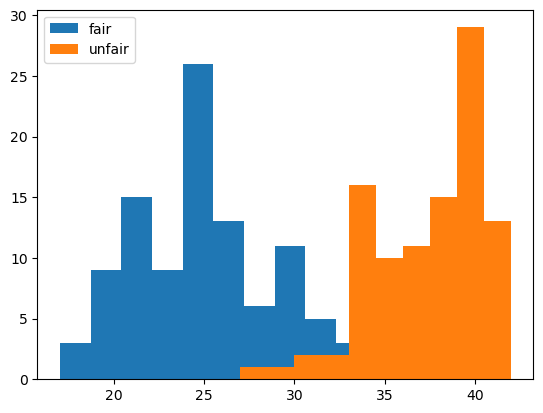

In [36]:
plt.hist(nheads_fair,bins=10,label="fair")
plt.hist(nheads_unfair,bins=10,label="unfair")
plt.legend()

In [37]:
np.mean(nheads_fair)

24.92

In [40]:
np.mean(nheads_unfair)

37.17